## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Colab Notebooks/Dataset/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Dataset/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



87924736/87910968 [==============================] - 1s 0us/step


In [8]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [9]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Dataset/train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [18]:
import matplotlib.pyplot as plt

In [19]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

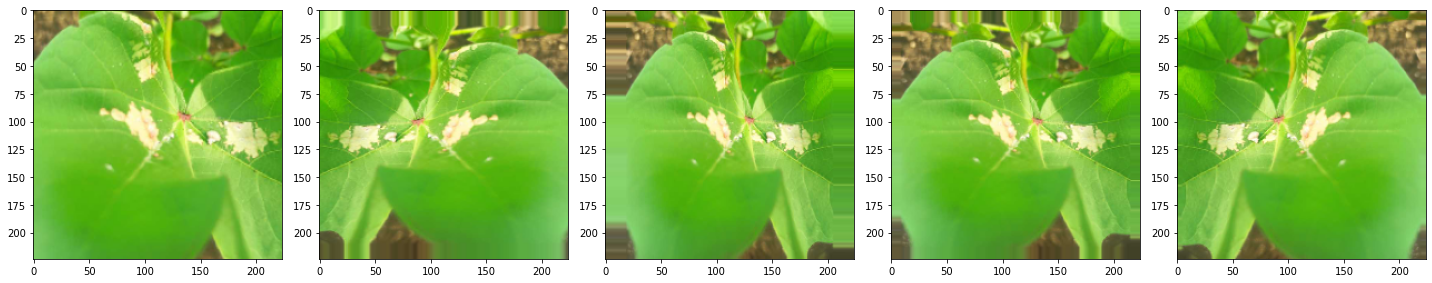

In [20]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 771s 12s/step - loss: 3.1091 - accuracy: 0.6991 - val_loss: 0.1503 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 208s 3s/step - loss: 0.5930 - accuracy: 0.8944 - val_loss: 0.0794 - val_accuracy: 0.9444
Epoch 3/20
61/61 [==============================] - 209s 3s/step - loss: 0.8424 - accuracy: 0.8775 - val_loss: 0.3177 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 209s 3s/step - loss: 0.7275 - accuracy: 0.9026 - val_loss: 0.6834 - val_accuracy: 0.8333
Epoch 5/20
61/61 [==============================] - 209s 3s/step - loss: 0.5701 - accuracy: 0.9170 - val_loss: 0.2274 - val_accuracy: 0.8889
Epoch 6/20
61/61 [==============================] - 208s 3s/step - loss: 0.7856 - accuracy: 0.9016 - val_loss: 0.0967 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 208s 3s/step - loss: 0.5047 - accuracy: 0.9380 - val_loss: 0.0436 - val_accuracy: 0.9444
Epoch 8/20
6

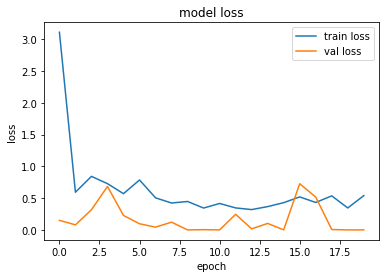

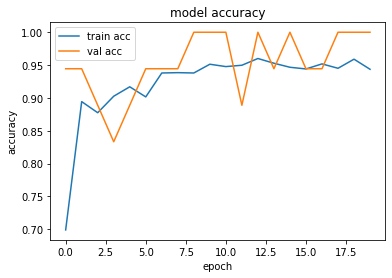

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/Dataset/model_inception.h5')

In [24]:
accuracy = r.history["accuracy"][-1]
val_accuracy = r.history["val_accuracy"][-1]
loss = r.history["loss"][-1]
val_loss = r.history["val_loss"][-1]

In [26]:
print("Accuracy of InceptionV3 model: {}".format(accuracy) )
print("Loss of InceptionV3 model: {}".format(loss) )

Accuracy of InceptionV3 model: 0.943618655204773
Loss of InceptionV3 model: 0.5393487215042114
